# Exploratory Data Analysis on Super Store

**Introduction**

Super Store is a small retail business located in the United States. They sell Furniture, Office Supplies and Technology products and their customers are the mass Consumer, Corporate and Home Offices. The data set contains sales, profit and geographical information of individual orders.

Our task is to determine weak areas and opportunities for Super Store to boost business growth.

Business Questions

1. Which Category is Best Selling and Most Profitable?
2. What are the Best Selling and Most Profitable Sub-Category?
3. Which is the Top Selling Sub-Category?
4. Which Customer Segment is Most Profitable?
5. Which is the Preferred Ship Mode?
6. Which Region is the Most Profitable?
7. Which City has the Highest Number of Sales?

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Read in data in CSV format
df = pd.read_csv(r"C:\Users\lasis\Downloads\Superstore.csv", encoding='ISO-8859-1')
# Preview first 5 rows of data set
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Data Exploration & Data Cleaning**

In [3]:

# Summarised information of data set
df.info()

# Shape of data set
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
#convert the date column to date format 

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
# Find the number of null values for all columns
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

The result shows that the dataset does not have any null value

In [9]:
# Find the number of duplicate data
df.duplicated().sum()

0

The result shows that the dataset have no duplicate data, we are are dealing with unique values 

In [12]:
df['Profit Margin %'] = (df.Profit / df.Sales) * 100
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin %
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25


In [13]:
# Get descriptive statistics summary
df.describe(include = "all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin %
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,...,4,1862,3,17,1850,NaN,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,...,3203,19,6026,1523,48,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896,12.031393
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750,7.500000
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500,27.000000
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000,36.250000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000,50.000000


You will see 'NaN' in some of the categorical columns and that's perfectly fine. Categorical values are not meant to have calculations performed on them so, we can ignore those.

What we want to focus is the unique count and frequency of the categorical features such as

There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.
The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.
While for numerical parameters, it's interesting to note that the

75% of orders makes at least 36% profit margin.
Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.
We will perform some analysis below to test these observations.

**Exploratory Data Analysis**
1. Which Category is Best Selling and Most Profitable?

Best Selling means looking at the Sales and Most Profitable is referring to the Profit. We will group the Sales, Profit and also Quantity by Category and run the df.group().sum and pd.DataFrame() functions.

In [14]:
# Group sales, profit and quantity by category
category_analysis = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741999.7953,18451.2728,8028
Office Supplies,719047.0320,122490.8008,22906
Technology,836154.0330,145454.9481,6939


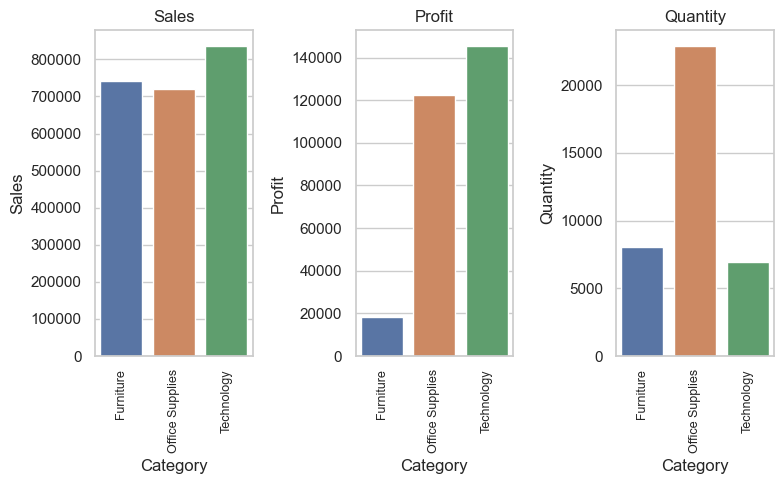

In [15]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
cat1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0])
cat2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1])
cat3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 9)

# Set spacing between subplots
figure.tight_layout()

Our observations are:

1. All 3 categories - Furniture, Office Supplies and Technology make similar amount of sales.
2. Technology is Best Selling and it's good to know that this category is the Most Profitable too. Only minimal quantity is sold as these products are usually one-off purchases that can last at least 4-5 years.
3. Although Furniture makes similar sales as Technology, it is the least profitable and quantity sold are at a minimum too.
4. Office Supplies sells the most in terms of quantity as it is relatively cheap product.

2. What are the Best Selling and Most Profitable Sub-Category?

In [22]:
# Group by sub-category
subcat_analysis = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit']].sum())

In [23]:
# Sort by descending order according to sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203412.7330,30221.7633
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [24]:
# Sort by descending order according to profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


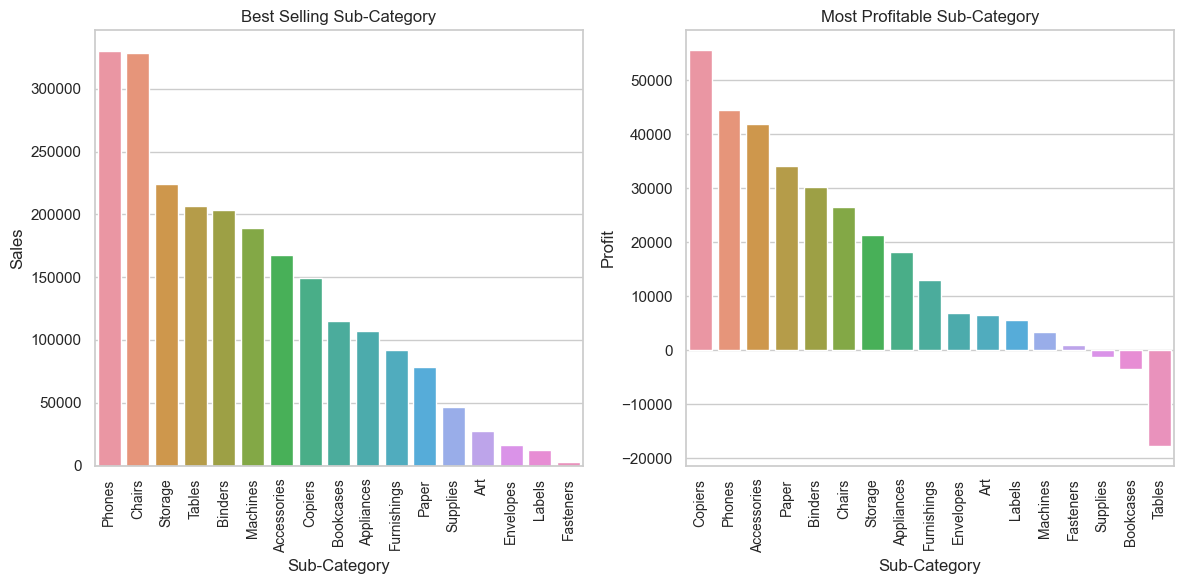

In [25]:
# Plot Bar Plots

sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = subcat_sales, x = subcat_sales.index, y = subcat_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = subcat_profit, x = subcat_profit.index, y = subcat_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

Let's analyse the bar plots:

1. Phones and Chairs are Top 2 best selling sub-category.
2. Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
3. On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

3. Which is the Top Selling Sub-Category?

In [27]:
subcat_quantity = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5974
Paper,5178
Furnishings,3563
Phones,3289
Storage,3158
Art,3000
Accessories,2976
Chairs,2356
Appliances,1729


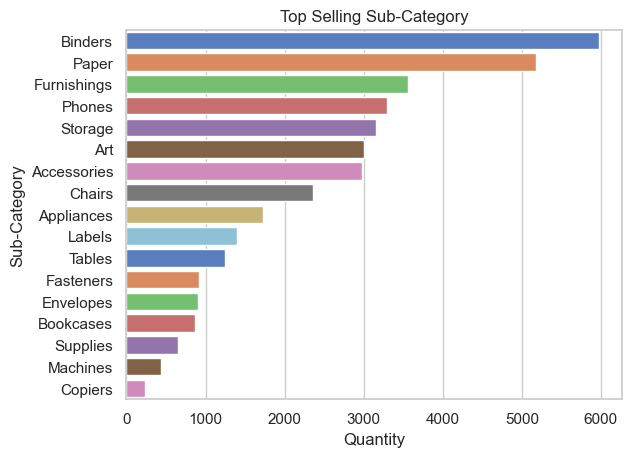

In [28]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

Here, we can deduce that

1. Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Binders, Paper, Furnishings and Phones.
2. Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all.

4. Which Customer Segment is Most Profitable?

In [29]:
segment_analysis = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


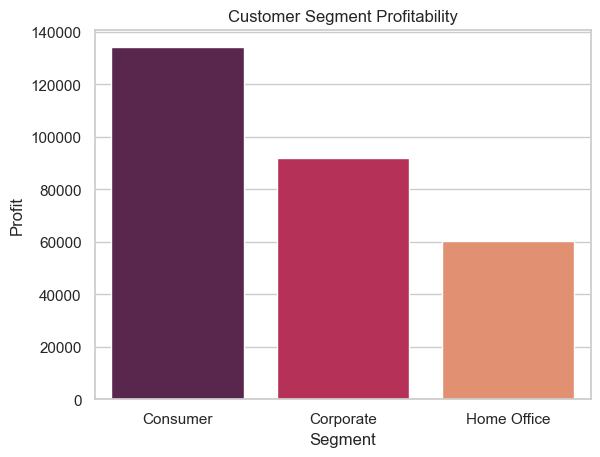

In [30]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = segment_analysis, x = segment_analysis.index, y = segment_analysis.Profit, palette = "rocket")
plt.title("Customer Segment Profitability")
plt.show()


Consumer segment is most profitable, followed by Corporate Segment and Home Office. Hence, marketing strategy has to target or place more focus on retaining Consumer and Corporate Segment customers.

5. Which is the Preferred Ship Mode?

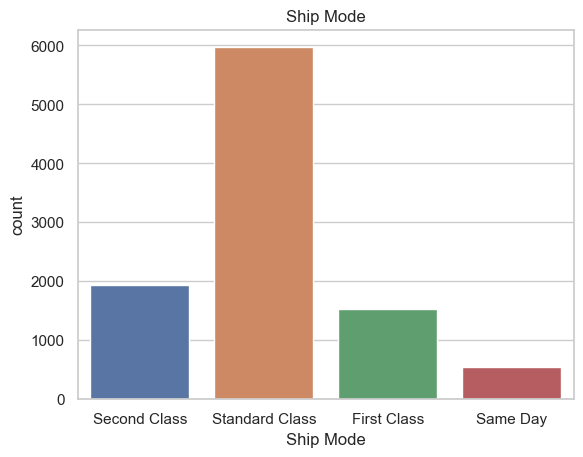

In [32]:
# Plot shipment mode

sns.set_theme(style="whitegrid")
sns.countplot(data=df, x='Ship Mode')
plt.title("Ship Mode")
plt.show()


By a landslide, Standard Class is the preferred method of shipment and perhaps the cheapest one too. 

6. Which Region is the Most Profitable?

In [33]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


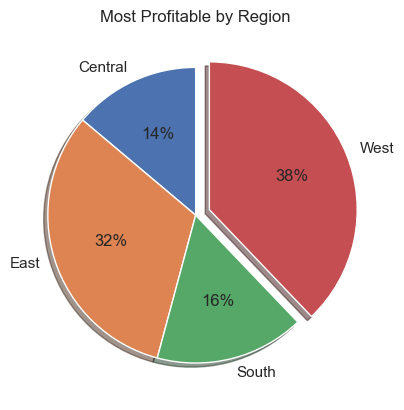

In [34]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]

plt.pie(region_analysis.Profit, labels = region_analysis.Region, startangle = 90, autopct = "%1.0f%%", explode = explode, shadow = True)
plt.title("Most Profitable by Region")

plt.show()

East and West region are most profitable.

7. Which City has the Highest Number of Sales?

In [37]:
city_sales = pd.DataFrame(df.groupby('City')[['Sales', 'Quantity']].sum().sort_values('Sales', ascending=False))
top10 = city_sales.head(10)
top10



,Sales,Quantity
City,,
New York City,256368.1610,3417
Los Angeles,175851.3410,2879
Seattle,119540.7420,1590
San Francisco,112669.0920,1935
Philadelphia,109077.0130,1981
Houston,64504.7604,1466
Chicago,48539.5410,1132
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [38]:
bottom10 = city_sales.tail(10)

bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


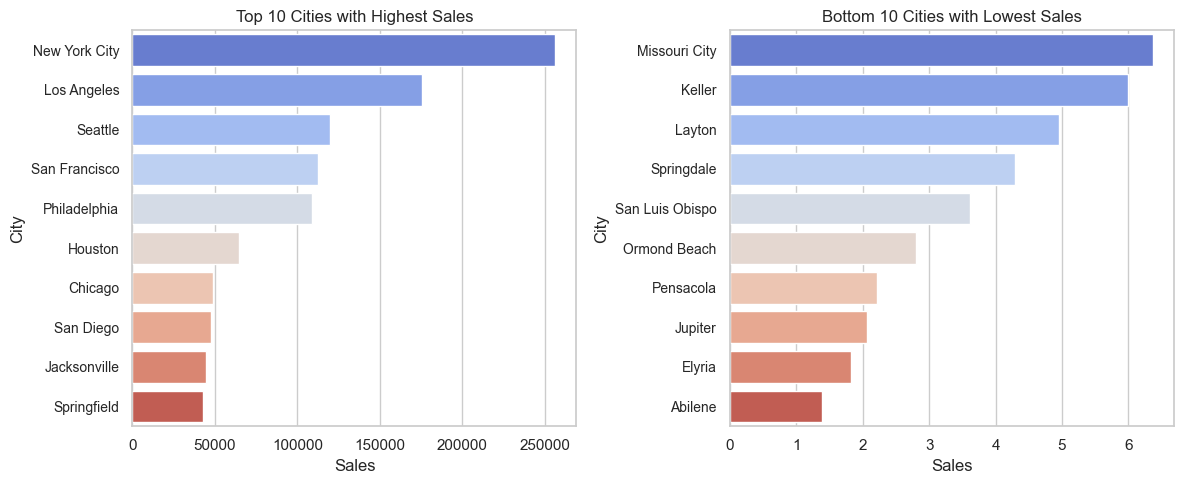

In [40]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

# Plot Bar Plot for Top 10 Cities with Highest Sales
top10c = sns.barplot(data=top10, y=top10.index, x="Sales", palette="coolwarm", ax=axis[0])
top10c.set_title("Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(), size=10)

# Plot Bar Plot for Bottom 10 Cities with Lowest Sales
bottom10c = sns.barplot(data=bottom10, y=bottom10.index, x="Sales", palette="coolwarm", ax=axis[1])
bottom10c.set_title("Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(), size=10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

There is a huge disparity between the cities with highest sales and lowest sales. Marketing strategy has to target the top 10 cities.

Strategic Recommendation

Here, we revisit our business questions and share with you our high-level business recommendations.

Business Questions

1. Which Category is Best Selling and Most Profitable?
2. What are the Best Selling and Most Profitable Sub-Category?
3. Which is the Top Selling Sub-Category?
4. Which Customer Segment is Most Profitable?
5. Which is the Preferred Ship Mo
6. Which Region is the Most Profitable?

Recommendations

1. Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
2. Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
3. For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with 4. products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
4. For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
5. Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers.